In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

C:\Users\asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
x_train , y_train = load_data()

In [3]:
print("Type of x_train: ", type(x_train))

print("First seven elements of x_train are:\n", x_train[:7])

Type of x_train:  <class 'numpy.ndarray'>
First seven elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598 8.3829 7.4764]


In [4]:
print("Typr of y_train: ", type(y_train))

print("First seven elements of y_train are:\n", y_train[:7])

Typr of y_train:  <class 'numpy.ndarray'>
First seven elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233 11.886   4.3483]


In [5]:
print('The shape of x_train is:', x_train.shape)

The shape of x_train is: (97,)


In [6]:
print('The shape of y_train is: ', y_train.shape)

The shape of y_train is:  (97,)


In [7]:
print('Number of training examples (m):', len(x_train))

Number of training examples (m): 97


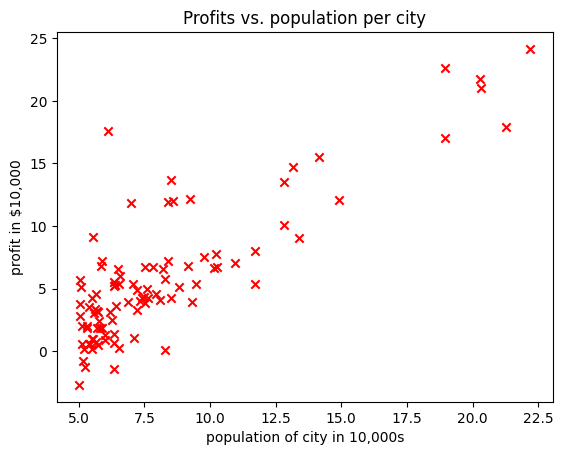

In [8]:
plt.scatter(x_train,y_train, marker = 'x', c = 'r')

plt.title("Profits vs. population per city")

plt.ylabel('profit in $10,000')

plt.xlabel('population of city in 10,000s')

plt.show()


In [9]:
# Cost Funtion

In [10]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    
    total_cost = 0
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] +b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1/(2*m)) * cost_sum
    
    return total_cost

In [11]:
initial_w =2
initial_b =1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w:{cost:.3f}')

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w:75.203
All tests passed!


In [12]:
# Gradients

In [13]:
def compute_gradient(x, y, w, b):
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [14]:
initial_w = 0.0
initial_b = 0.0

tmp_dj_dw, tmp_dj_db= compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w,b(zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w,b(zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [15]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [16]:
#Gradient Descent

In [17]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    
    m = len(x)
    
    J_history = []
    w_history = []
    
    w = copy.deepcopy(w_in)
    b = b_in
    
    
    for i in  range(num_iters):
        
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        
        
        if i<100000:
            
            cost = cost_function(x, y, w, b)
            
            J_history.append(cost)
            
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"iteration {i:4}: Cost {float(J_history[-1]): 8.2f}  ")
        
        
        
    return w, b , J_history, w_history
        

In [18]:
initial_w = 0
initial_b = 0


iterations = 1500

alpha = 0.01

w,b,_,_ = gradient_descent(x_train, y_train, initial_w, initial_b,
                          compute_cost, compute_gradient, alpha, iterations)

print("w, b found by gradient descent:", w, b)

iteration    0: Cost     6.74  
iteration  150: Cost     5.31  
iteration  300: Cost     4.96  
iteration  450: Cost     4.76  
iteration  600: Cost     4.64  
iteration  750: Cost     4.57  
iteration  900: Cost     4.53  
iteration 1050: Cost     4.51  
iteration 1200: Cost     4.50  
iteration 1350: Cost     4.49  
w, b found by gradient descent: 1.166362350335582 -3.63029143940436


In [19]:
m = x_train.shape[0]
predicted = np.zeros(m)


for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of city in 10,000s')

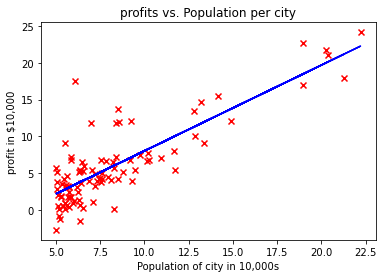

In [20]:
plt.plot(x_train, predicted, c = 'b')

plt.scatter(x_train, y_train, marker = 'x' , c='r')

plt.title("profits vs. Population per city")

plt.ylabel('profit in $10,000')


plt.xlabel('Population of city in 10,000s')

In [21]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 10.0 * w + b
print('For population = 100,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 100,000, we predict a profit of $80333.32


In [22]:
# ADDING REGULARIZATION

In [25]:
def compute_cost_linear_reg(X, y, w, b, lambda_=1):
    
    
    m = X.shape[0]
    n = len(w)
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i] , w) +b
        cost = cost + (f_wb_i - y[i]) **2
    cost = cost / (2 * m)
    
    reg_cost = 0
    for j in range(n):
        
        reg_cost += (w[j]**2)
        
    reg_cost = (lambda_/(2*m)) * reg_cost
    
    
    total_cost = cost + reg_cost
    
    return total_cost
    

In [26]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])

w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
                       
b_tmp = 0.5
                       
lambda_tmp = 0.7
                    
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)                       
                       
                       
print("Regularized cost:", cost_tmp)                       

Regularized cost: 0.07917239320214277


In [31]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    
    
    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [32]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]
